In [1]:
#Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from scipy.stats import sem
from scipy.stats import f_oneway
import statsmodels.formula.api as smf

# Load data
df = pd.read_csv("/Users/aidanastridge/Documents/HPI_CPI_StatsCan_G3.csv")

In [2]:
#Function for explatory data analysis
def eda(x):
    print(x.name)
    print("Mean:", np.mean(x))
    print("Standard Deviation:", np.std(x))
    print("Variance:",np.var(x))
    print("Minimum:",np.min(x))
    print("Q25:", np.quantile(x,.25))
    print("Median:",np.quantile(x,.5))
    print("Q75:",np.quantile(x,.75))
    print("Maximum:",np.max(x))
    print("")

In [3]:
for x in list(df['GEO'].unique()):
    print(x)
    eda(df.loc[df['GEO'] == x, 'NHPI']) 

Ontario
NHPI
Mean: 90.70242424242424
Standard Deviation: 10.276067821916339
Variance: 105.5975698806244
Minimum: 75.2
Q25: 80.8
Median: 89.3
Q75: 103.0
Maximum: 108.8

Alberta
NHPI
Mean: 97.51878787878789
Standard Deviation: 3.491367499363344
Variance: 12.189647015610648
Minimum: 90.9
Q25: 94.1
Median: 98.6
Q75: 100.1
Maximum: 104.3

Quebec
NHPI
Mean: 97.20424242424242
Standard Deviation: 6.583002460562804
Variance: 43.33592139577594
Minimum: 81.8
Q25: 93.2
Median: 98.7
Q75: 100.3
Maximum: 112.7



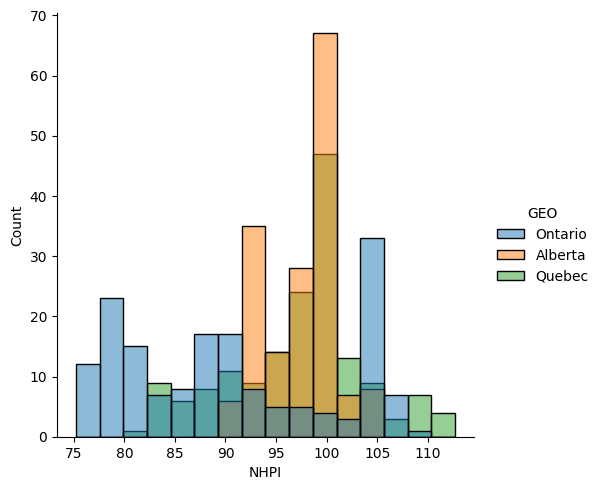

In [4]:
sns.displot(df,x="NHPI", hue="GEO")

<Axes: xlabel='GEO', ylabel='NHPI'>

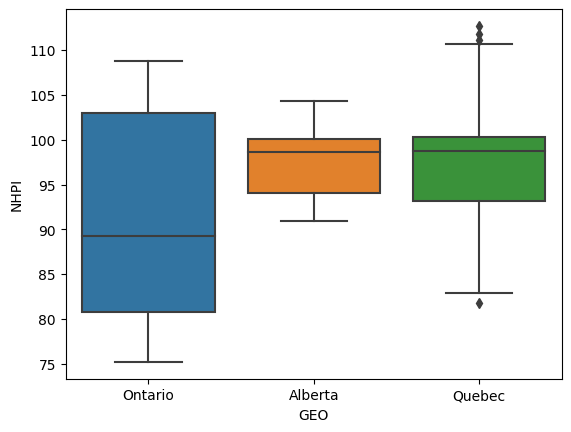

In [5]:
sns.boxplot(x='GEO',y='NHPI',data=df)

In [6]:

for x in list(df['GEO'].unique()):
    print(x)
    print("Confidence level alpha =.05:",sms.DescrStatsW(df.loc[df['GEO'] == x, 'NHPI']).tconfint_mean())
    print("Standard error of the mean:", sem(df.loc[df['GEO'] == x, 'NHPI']))
    print("")

Ontario
Confidence level alpha =.05: (89.11800619384431, 92.2868422910042)
Standard error of the mean: 0.8024260845855645

Alberta
Confidence level alpha =.05: (96.98047052081766, 98.05710523675809)
Standard error of the mean: 0.2726299982555944

Quebec
Confidence level alpha =.05: (96.1892405681709, 98.21924428031394)
Standard error of the mean: 0.5140461293940216



In [7]:
#ANOVA on Business Line (Corporate, Commercial, Small Business)
x = df.loc[df['GEO'] == 'Ontario', 'NHPI']
y = df.loc[df['GEO'] == 'Alberta', 'NHPI']
z = df.loc[df['GEO'] == 'Quebec', 'NHPI']

f_oneway(x, y, z)

F_onewayResult(statistic=45.21077605323207, pvalue=9.440732407822924e-19)

NHPI by geography and is significantly different.

In [8]:
mod = smf.ols(formula="NHPI ~ Gasoline*GEO + Goods*GEO", data=df).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   NHPI   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     402.6
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          6.07e-209
Time:                        14:30:51   Log-Likelihood:                -1227.2
No. Observations:                 495   AIC:                             2472.
Df Residuals:                     486   BIC:                             2510.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

When accounting for and interacting gasoline, goods, and region: 87% of the change in the NHPI by can explained by the former variables. Suprisngly, gasoline alone becomes insignificant when accounting for all interactions at the default of Alberta. 